# <font color='red'>COMPUTER VISION WITH DEEP LEARNING</font>

# <font color='blue'>Face Recognition using GhostFaceNet</font>

### <font color='green'>1. Set up required libraries</font>

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 37.3 MB/s eta 0:00:00


In [2]:
import os
import glob
import random
import shutil
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### <font color='green'>2. Divide Data into train, valid, test and copy images with labels to working directory</font>

In [3]:
INPUT_DIR = "/kaggle/input/traffic-signs-dataset-in-yolo-format/ts/ts"
OUTPUT_DIR = "/kaggle/working/ts_split"
os.makedirs(os.path.join(OUTPUT_DIR, "train", "images"), exist_ok=True)
os.makedirs(os.path.join(OUTPUT_DIR, "train", "labels"), exist_ok=True)
os.makedirs(os.path.join(OUTPUT_DIR, "valid", "images"), exist_ok=True)
os.makedirs(os.path.join(OUTPUT_DIR, "valid", "labels"), exist_ok=True)
os.makedirs(os.path.join(OUTPUT_DIR, "test", "images"), exist_ok=True)
os.makedirs(os.path.join(OUTPUT_DIR, "test", "labels"), exist_ok=True)

all_images = sorted(glob.glob(os.path.join(INPUT_DIR, "*.jpg")))
total = len(all_images)
train_count = int(0.56 * total)
valid_count = int(0.14 * total)
test_count = total - train_count - valid_count

random.seed(42)
random.shuffle(all_images)
train_imgs = all_images[:train_count]
valid_imgs = all_images[train_count:train_count+valid_count]
test_imgs = all_images[train_count+valid_count:]

def copy_files(img_list, split):
    for img_path in img_list:
        base = os.path.basename(img_path)
        txt_path = os.path.splitext(img_path)[0] + ".txt"
        dest_img = os.path.join(OUTPUT_DIR, split, "images", base)
        dest_txt = os.path.join(OUTPUT_DIR, split, "labels", os.path.basename(txt_path))
        shutil.copy(img_path, dest_img)
        if os.path.exists(txt_path):
            shutil.copy(txt_path, dest_txt)

copy_files(train_imgs, "train")
copy_files(valid_imgs, "valid")
copy_files(test_imgs, "test")
print("Dataset split completed.")

Dataset split completed.


### <font color=green>3. Create YAML file of the dataset structure for YOLO</font>

In [4]:
yaml_content = f"""
train: {os.path.join(OUTPUT_DIR, "train", "images")}
val: {os.path.join(OUTPUT_DIR, "valid", "images")}
test: {os.path.join(OUTPUT_DIR, "test", "images")}
nc: 4
names: ['prohibitory', 'danger', 'mandatory', 'other']
"""
yaml_path = os.path.join("/kaggle/working", "ts.yaml")
with open(yaml_path, "w") as f:
    f.write(yaml_content)
print("YAML file created at:", yaml_path)


YAML file created at: /kaggle/working/ts.yaml


### <font color=green>4. Training YOLO v11 from ultralytics</font>

In [5]:
from ultralytics import YOLO

model = YOLO("yolo11m.pt")
model.train(data=yaml_path, epochs=30, imgsz=640, batch=32)

100%|██████████| 38.8M/38.8M [00:00<00:00, 237MB/s]


Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/kaggle/working/ts.yaml, epochs=30, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

100%|██████████| 755k/755k [00:00<00:00, 44.5MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 151MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/ts_split/train/labels... 414 images, 0 backgrounds, 0 corrupt: 100%|██████████| 414/414 [00:00<00:00, 1250.02it/s]

train: New cache created: /kaggle/working/ts_split/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/working/ts_split/valid/labels... 103 images, 0 backgrounds, 0 corrupt: 100%|██████████| 103/103 [00:00<00:00, 1224.92it/s]

val: New cache created: /kaggle/working/ts_split/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      14.8G      1.235      5.969     0.9682         91        640: 100%|██████████| 13/13 [00:19<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]

                   all        103        165      0.503      0.649      0.666      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      15.1G     0.9055       1.56     0.8351         95        640: 100%|██████████| 13/13 [00:19<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all        103        165      0.961      0.814      0.896      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      14.6G     0.9152     0.9931      0.833        103        640: 100%|██████████| 13/13 [00:19<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all        103        165      0.927      0.855      0.912      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      15.5G     0.9101     0.7973     0.8466         73        640: 100%|██████████| 13/13 [00:18<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all        103        165      0.317      0.608      0.248      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      15.5G     0.9143     0.7419     0.8449         58        640: 100%|██████████| 13/13 [00:18<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all        103        165      0.603      0.721      0.617      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      14.6G     0.8636     0.6798     0.8338         93        640: 100%|██████████| 13/13 [00:18<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all        103        165          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      14.6G     0.9037     0.7164     0.8518         80        640: 100%|██████████| 13/13 [00:18<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all        103        165     0.0868     0.0936     0.0478     0.0156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30        15G     0.8509     0.6474     0.8514        102        640: 100%|██████████| 13/13 [00:18<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all        103        165     0.0382     0.0947     0.0411      0.021



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      14.6G     0.8179     0.5762     0.8317         55        640: 100%|██████████| 13/13 [00:18<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all        103        165          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      14.6G     0.8482     0.5866     0.8498         95        640: 100%|██████████| 13/13 [00:18<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/engine/validator.py:289: RuntimeWarning: invalid value encountered in greater_equal
  matches = np.nonzero(iou >= threshold)  # IoU > threshold and classes match
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all        103        165          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      14.6G     0.8358     0.5563     0.8356         74        640: 100%|██████████| 13/13 [00:18<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/engine/validator.py:289: RuntimeWarning: invalid value encountered in greater_equal
  matches = np.nonzero(iou >= threshold)  # IoU > threshold and classes match
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all        103        165      0.547      0.166      0.159        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      14.6G     0.8177     0.5479     0.8248         85        640: 100%|██████████| 13/13 [00:18<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/engine/validator.py:289: RuntimeWarning: invalid value encountered in greater_equal
  matches = np.nonzero(iou >= threshold)  # IoU > threshold and classes match
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all        103        165      0.484     0.0711      0.063     0.0428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      14.6G     0.8078     0.5368     0.8252         91        640: 100%|██████████| 13/13 [00:18<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/engine/validator.py:289: RuntimeWarning: invalid value encountered in greater_equal
  matches = np.nonzero(iou >= threshold)  # IoU > threshold and classes match
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all        103        165      0.779       0.22      0.228      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      14.6G     0.8212     0.5258      0.826         86        640: 100%|██████████| 13/13 [00:18<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all        103        165      0.904      0.805       0.89      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      14.6G     0.7919     0.5204     0.8279         99        640: 100%|██████████| 13/13 [00:18<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all        103        165      0.893      0.936      0.951       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30        15G     0.7337     0.4746     0.8179         81        640: 100%|██████████| 13/13 [00:18<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all        103        165      0.925      0.876      0.944      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      15.5G      0.751     0.4751     0.8293         83        640: 100%|██████████| 13/13 [00:18<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all        103        165      0.916        0.9      0.948      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      14.6G     0.7262     0.4431     0.8034         91        640: 100%|██████████| 13/13 [00:18<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all        103        165      0.952      0.937      0.974      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      14.6G     0.6823     0.4257     0.8089         66        640: 100%|██████████| 13/13 [00:18<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all        103        165      0.941      0.916      0.976      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      14.5G     0.6796     0.4191     0.7968         69        640: 100%|██████████| 13/13 [00:18<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all        103        165      0.981      0.924      0.969      0.787


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      15.5G     0.6643     0.4364     0.8011         50        640: 100%|██████████| 13/13 [00:19<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all        103        165      0.973      0.893      0.977      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      14.6G     0.6519     0.4092     0.8089         42        640: 100%|██████████| 13/13 [00:18<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all        103        165      0.952      0.945      0.972      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      15.5G     0.6489     0.4006     0.8061         45        640: 100%|██████████| 13/13 [00:18<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all        103        165      0.952      0.913      0.969       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      14.5G     0.6282     0.3892     0.7952         50        640: 100%|██████████| 13/13 [00:18<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all        103        165      0.985      0.915       0.97      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      15.5G     0.6061     0.3836     0.8003         51        640: 100%|██████████| 13/13 [00:18<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all        103        165      0.957      0.949      0.982      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      14.6G      0.603     0.3798     0.7964         42        640: 100%|██████████| 13/13 [00:18<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all        103        165      0.951      0.955      0.988      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      15.5G     0.5739     0.3504     0.8064         45        640: 100%|██████████| 13/13 [00:18<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all        103        165       0.97      0.963      0.984      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      14.6G     0.5808     0.3704     0.7995         43        640: 100%|██████████| 13/13 [00:18<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all        103        165      0.962      0.951      0.983      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      15.5G     0.5534     0.3416     0.7986         49        640: 100%|██████████| 13/13 [00:18<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all        103        165      0.963      0.948      0.978      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      14.5G     0.5547     0.3566     0.7878         51        640: 100%|██████████| 13/13 [00:18<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

                   all        103        165      0.953      0.951      0.978      0.819



30 epochs completed in 0.178 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 40.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11m summary (fused): 125 layers, 20,033,116 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]


                   all        103        165      0.953      0.951      0.978      0.819
           prohibitory         51         77      0.978          1      0.995      0.872
                danger         19         24          1      0.935      0.963      0.822
             mandatory         22         24      0.862          1      0.991      0.818
                 other         29         40      0.972      0.869      0.964      0.764


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 8.2ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x780e942e3820>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

### <font color=green>Visualize predictions of 8 images from test data</font>


image 1/1 /kaggle/working/ts_split/test/images/00027.jpg: 384x640 2 prohibitorys, 13.8ms
Speed: 3.5ms preprocess, 13.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/working/ts_split/test/images/00030.jpg: 384x640 1 mandatory, 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/working/ts_split/test/images/00032.jpg: 384x640 1 mandatory, 1 other, 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/working/ts_split/test/images/00044.jpg: 384x640 1 other, 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/working/ts_split/test/images/00046.jpg: 384x640 1 other, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/working/ts_split/test/images/00048.jpg: 384x640 2 mandato

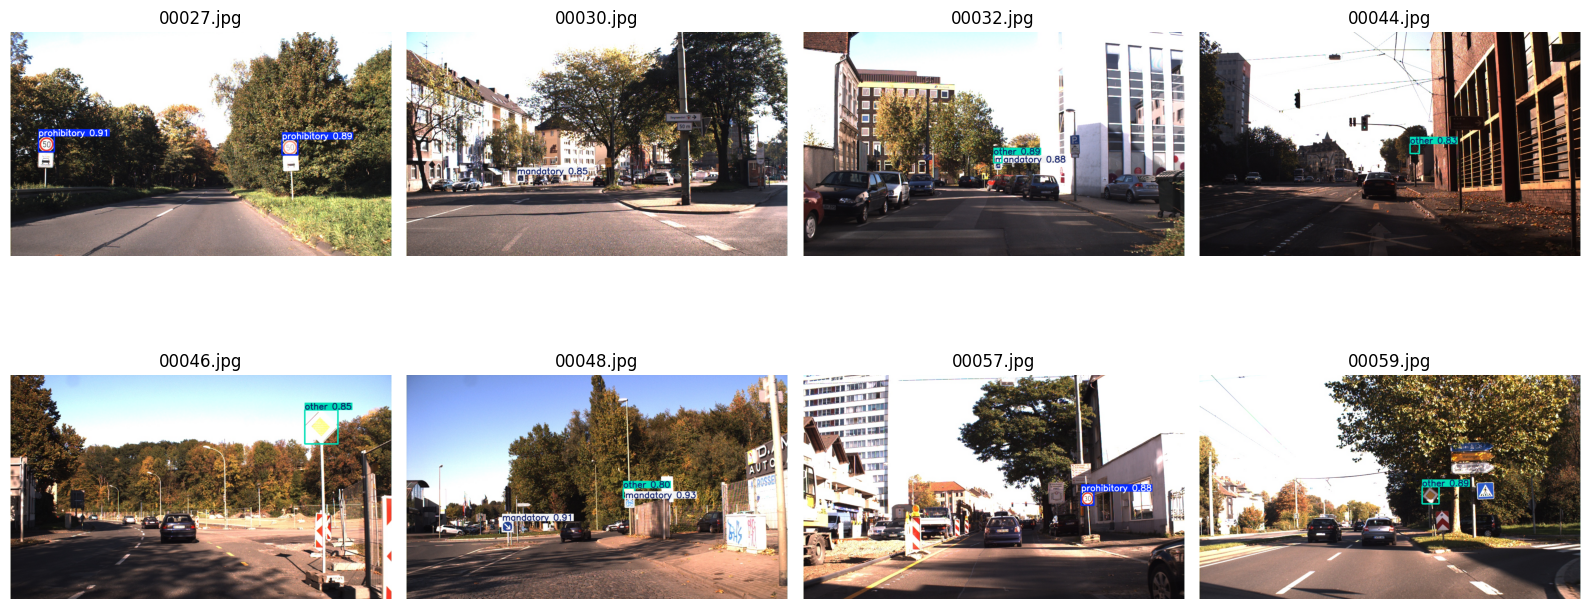

In [8]:
sample_test = sorted(glob.glob(os.path.join(OUTPUT_DIR, "test", "images", "*.jpg")))[8:16]
plt.figure(figsize=(16,8))
for i, img_path in enumerate(sample_test):
    results = model(img_path, imgsz=640)
    annotated_frame = results[0].plot()
    plt.subplot(2,4,i+1)
    plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
    plt.title(os.path.basename(img_path))
    plt.axis("off")
plt.tight_layout()
plt.show()

### <font color=green>Evaulate the model on test dataset (mAP@50)</font>

In [7]:
metrics = model.val(data=yaml_path, split="test")
print(metrics)

Ultralytics 8.3.94 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)


val: Scanning /kaggle/working/ts_split/test/labels... 224 images, 0 backgrounds, 0 corrupt: 100%|██████████| 224/224 [00:00<00:00, 1234.53it/s]

val: WARNING ⚠️ /kaggle/working/ts_split/test/images/00340.jpg: 1 duplicate labels removed
val: New cache created: /kaggle/working/ts_split/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]


                   all        224        386      0.984      0.937      0.971      0.835
           prohibitory        119        173      0.983      0.976      0.993      0.865
                danger         64         81      0.997      0.975      0.988      0.864
             mandatory         43         51      0.968      0.902      0.944      0.796
                 other         61         81      0.986      0.896      0.959      0.814


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 1.7ms preprocess, 8.2ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x780e7fd25c30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.03903